In [98]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
sites = ['UKBB11026',
        'UKBB11027',
        'UKBB11025']

p_sex = './results_paper/sex/ukbb/'
p_age = './results_paper/age/ukbb/'

p_sex_st = './results_paper/sex/ukbb/ukbb_11025/'
p_age_st = './results_paper/age/ukbb/ukbb_11025/'

mtl_sample_sizes = [50,100,200,500,1000,1500,2000,2500,3000,3500,4000,4500]
st_sample_sizes = [150,300,600,1500,3000,4500,6000,7500,9000,10500,12000,13500]

# Sex

In [112]:
sex_st = []
for k in st_sample_sizes:
    # Single Task

    folds = []
    for fold in range(5):
        p_parent = os.path.join(p_sex_st, f"{k}/fold_{fold}")
        files = [f for f in os.listdir(p_parent) if f[-4:]=='.csv']
        if len(files) != 0:
            file = files[0]
            acc = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])['UKBB11025']['Accuracy/test'].loc[99]
            folds.append(acc)
        else:
            print(f'{k} fold {fold}')
    
    if len(folds) != 0:
        # Get accuracy
        st_acc = np.mean(folds)
        st_acc_std = np.std(folds)
        sex_st.append((st_acc, st_acc_std))

12000 fold 0
13500 fold 1


In [113]:
df_st_sex = pd.DataFrame(sex_st,columns=['UKBB11025','UKBB11025_STD'])
df_st_sex['st_sample'] = st_sample_sizes
df_st_sex

,UKBB11025,UKBB11025_STD,st_sample
0,74.000000,8.793937,150
1,79.666667,5.517648,300
2,84.500000,2.449490,600
3,83.466667,1.343296,1500
4,86.700000,1.082179,3000
5,86.800000,0.805536,4500
6,88.416667,0.750925,6000
7,88.213333,2.043265,7500
8,88.355556,0.607159,9000
9,89.285714,0.244671,10500


In [114]:
mtl_sex_11025 = []
mtl_sex_11026 = []
mtl_sex_11027 = []
for k in mtl_sample_sizes:
    # Multi-task
    folds_11025 = []
    folds_11026 = []
    folds_11027 = []
    for fold in range(5):
        p_parent = os.path.join(p_sex, f"mtl/{k}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        data = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])

        
        folds_11025.append(data['UKBB11025']['Accuracy/test'].loc[99])
        folds_11026.append(data['UKBB11026']['Accuracy/test'].loc[99])
        folds_11027.append(data['UKBB11027']['Accuracy/test'].loc[99])

    # Get accuracy
    acc_11025 = np.mean(folds_11025)
    acc_11026 = np.mean(folds_11026)
    acc_11027 = np.mean(folds_11027)

    std_11025 = np.std(folds_11025)
    std_11026 = np.std(folds_11026)
    std_11027 = np.std(folds_11027)
        
    mtl_sex_11025.append((acc_11025, std_11025))
    mtl_sex_11026.append((acc_11026, std_11026))
    mtl_sex_11027.append((acc_11027, std_11027))

In [115]:
df_mtl_sex_11025 = pd.DataFrame(mtl_sex_11025, columns = ['mtl_11025_acc','mtl_11025_std'])
df_mtl_sex_11026 = pd.DataFrame(mtl_sex_11026, columns = ['mtl_11026_acc','mtl_11026_std'])
df_mtl_sex_11027 = pd.DataFrame(mtl_sex_11027, columns = ['mtl_11027_acc','mtl_11027_std'])

df_mtl_sex_11025['mtl_sample'] = mtl_sample_sizes
df_mtl_sex_11026['mtl_sample'] = mtl_sample_sizes
df_mtl_sex_11027['mtl_sample'] = mtl_sample_sizes

Text(0.5, 0, 'Total subjects')

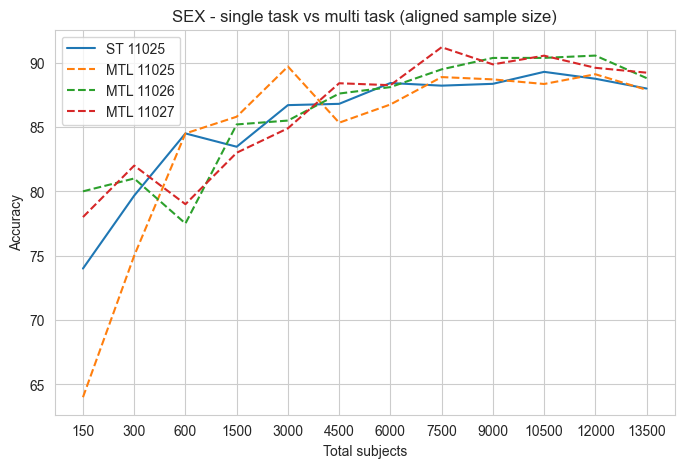

In [116]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
plt.plot(df_st_sex.index,df_st_sex['UKBB11025'],label='ST 11025')
plt.plot(df_mtl_sex_11025.index,df_mtl_sex_11025['mtl_11025_acc'],label='MTL 11025',ls='--')
plt.plot(df_mtl_sex_11026.index,df_mtl_sex_11026['mtl_11026_acc'],label='MTL 11026',ls='--')
plt.plot(df_mtl_sex_11027.index,df_mtl_sex_11027['mtl_11027_acc'],label='MTL 11027',ls='--')
plt.legend()
plt.xticks(ticks=df_mtl_sex_11027.index,labels=[150,300,600,1500,3000,4500,6000,7500,9000,10500,12000,13500])
plt.title('SEX - single task vs multi task (aligned sample size)')
plt.ylabel('Accuracy')
plt.xlabel('Total subjects')

# Age

In [117]:
age_st = []
for k in st_sample_sizes:
    # Single Task

    folds = []
    for fold in range(5):
        p_parent = os.path.join(p_age_st, f"{k}/fold_{fold}")
        files = [f for f in os.listdir(p_parent) if f[-4:]=='.csv']
        if len(files) != 0:
            file = files[0]
            acc = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])['UKBB11025']['Loss/test'].loc[99]
            folds.append(acc)
        else:
            print(f'{k} fold {fold}')
    
    if len(folds) != 0:
        # Get loss
        st_loss = np.mean(folds)
        st_loss_std = np.std(folds)
        age_st.append((st_loss, st_loss_std))

10500 fold 1
12000 fold 2
13500 fold 3


In [118]:
df_st_age = pd.DataFrame(age_st,columns=['UKBB11025','UKBB11025_STD'])
df_st_age['st_sample'] = st_sample_sizes
df_st_age

,UKBB11025,UKBB11025_STD,st_sample
0,10.766823,3.386077,150
1,9.886945,2.511516,300
2,7.651022,1.017901,600
3,6.379054,0.802609,1500
4,5.101958,0.268657,3000
5,5.349140,0.402720,4500
6,5.165669,0.620762,6000
7,4.721646,0.247501,7500
8,4.749765,0.211825,9000
9,4.600778,0.348971,10500


In [119]:
mtl_age_11025 = []
mtl_age_11026 = []
mtl_age_11027 = []
for k in mtl_sample_sizes:
    # Multi-task
    folds_11025 = []
    folds_11026 = []
    folds_11027 = []
    for fold in range(5):
        p_parent = os.path.join(p_age, f"mtl/{k}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        data = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])

        
        folds_11025.append(data['UKBB11025']['Loss/test'].loc[99])
        folds_11026.append(data['UKBB11026']['Loss/test'].loc[99])
        folds_11027.append(data['UKBB11027']['Loss/test'].loc[99])

    # Get accuracy
    loss_11025 = np.mean(folds_11025)
    loss_11026 = np.mean(folds_11026)
    loss_11027 = np.mean(folds_11027)

    std_11025 = np.std(folds_11025)
    std_11026 = np.std(folds_11026)
    std_11027 = np.std(folds_11027)
        
    mtl_age_11025.append((loss_11025, std_11025))
    mtl_age_11026.append((loss_11026, std_11026))
    mtl_age_11027.append((loss_11027, std_11027))

In [120]:
df_mtl_age_11025 = pd.DataFrame(mtl_age_11025, columns = ['mtl_11025_loss','mtl_11025_std'])
df_mtl_age_11026 = pd.DataFrame(mtl_age_11026, columns = ['mtl_11026_loss','mtl_11026_std'])
df_mtl_age_11027 = pd.DataFrame(mtl_age_11027, columns = ['mtl_11027_loss','mtl_11027_std'])

df_mtl_age_11025['mtl_sample'] = mtl_sample_sizes
df_mtl_age_11026['mtl_sample'] = mtl_sample_sizes
df_mtl_age_11027['mtl_sample'] = mtl_sample_sizes

Text(0.5, 0, 'Total subjects')

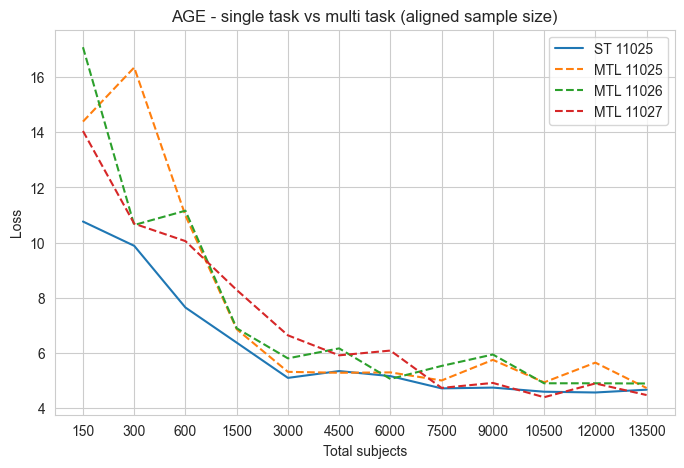

In [121]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
plt.plot(df_st_age.index,df_st_age['UKBB11025'],label='ST 11025')
plt.plot(df_mtl_age_11025.index,df_mtl_age_11025['mtl_11025_loss'],label='MTL 11025',ls='--')
plt.plot(df_mtl_age_11026.index,df_mtl_age_11026['mtl_11026_loss'],label='MTL 11026',ls='--')
plt.plot(df_mtl_age_11027.index,df_mtl_age_11027['mtl_11027_loss'],label='MTL 11027',ls='--')
plt.legend()
plt.xticks(ticks=df_mtl_age_11027.index,labels=[150,300,600,1500,3000,4500,6000,7500,9000,10500,12000,13500])
plt.title('AGE - single task vs multi task (aligned sample size)')
plt.ylabel('Loss')
plt.xlabel('Total subjects')